*comandos de LaTeX:*

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [0]:
#Carga de librerías
import math
import sympy
import numpy as np
from numpy.linalg import norm
from math  import sqrt
#from sympy import exp
from sympy import *
#from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger

#init_printing(use_latex='mathjax')

In [0]:
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)
init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

### La fase compleja

En mecánica cuántica, la fase compleja o *factor de fase* es un coeficiente complejo $e^{i \theta}$ que multiplica un ket $\ket{\psi}$ o un bra $\bra{\phi}$. Esta fase no altera el valor esperado de operadores hermíticos $\hat{B}$, dado que

$$
\bra{e^{i \theta} \psi} \hat{B} \ket{e^{i \theta} \psi} =\bra{ \psi} e^{-i \theta} \hat{B} e^{i \theta}\ket{ \psi} = \bra{ \psi}   \hat{B} e^{-i \theta} e^{i \theta}\ket{ \psi}
=\bra{\psi} \hat{B} \ket{\psi}
$$ 

así, este coeficiente no tiene un significado físico directo, más sí es responsable de efectos exhibidos en la función de onda de un sistema cuántico, como por ejemplo fenómenos de interferencia.

Un análogo clásico de la diferencia de fase (aunque también descrito por la mecánica cuántica) es el corrimiento de fase de una onda electromagnética en un factor $\theta$:

$$
\mathbf{A} e^{i \theta}  e^{i ( \mathbf{k \cdot  r} - \omega t)} = \mathbf{A} e^{i ( \mathbf{k \cdot  r} - \omega t + \theta)}
$$

donde $\mathbf{k}$ es el momentum de la onda, $\mathbf{r}$ su posición, $\omega$ su frecuencia y $t$ el tiempo.  

### La esfera de Bloch

Dado que un sistema cuántico debe tener una probabilidad total 1 sobre todo el espacio, el ket $\ket{\psi}$ que lo describe debe estar normalizado tal que $\braket{\psi}{\psi}=1$. Partiendo de esta ligadura se puede expresar un sistema de dos niveles $\psi$ en términos de dos parámetros $\phi$ y $\theta$ de la forma:

$$
\ket{\psi} = \cos \frac{\theta}{2} \ket{1} +  e^{i \phi} \sin \frac{\theta}{2} \ket{2}
$$

Esta parametrización nos permite representar geométricamente el qubit $\ket{\psi}$ de la siguiente forma:

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bloch_sphere.svg/500px-Bloch_sphere.svg.png)

Esta representación se conoce como **esfera de Bloch**, y nos permitirá visualizar la acción de algunas compuertas lógicas sobre un qubit. Para esto, usaremos la librería de mecánica cuántica QuTiP:

In [0]:
#instalación de la librería
!pip install QuTiP

In [0]:
import qutip
from qutip import Bloch

El método Bloch() de QuTiP nos permite visualizar la esfera de Bloch de manera sencilla:



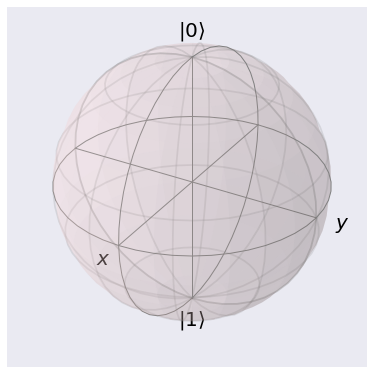

In [0]:
blochSphere = Bloch()
blochSphere.show()

In [0]:
### La siguiente función nos permitirá graficar un qubit sobre la esfera de Bloch

def blochCoords(qubit):
  qubit = np.array(qubit).astype(np.float64)
  qubit = qubit / norm(qubit)
  cosTheta = qubit[0,0]
  theta    = np.arccos(cosTheta)
  sinTheta = np.sin(theta)
  z        = cosTheta - sinTheta
  cosPsi = np.real(qubit[1,0]) / sinTheta
  sinPsi = np.imag(qubit[1,0]) / sinTheta
  vec      = np.real([cosPsi,sinPsi,z])
  vec      = vec / norm(vec)
  return vec

def blochPlot(qubit1,qubit2):
  qubit1 = np.array(qubit1).astype(np.float64)
  qubit2 = np.array(qubit2).astype(np.float64)
  vec1 = blochCoords(qubit1)
  vec2 = blochCoords(qubit2)
  print(vec1)
  b = Bloch()
  b.add_vectors([vec1,vec2])
  return b

### Sistemas de dos niveles

Un sistema de dos niveles es un sistema cuántico que puede existir en cualquier superposición de dos estados cuánticos físicamente distinguibles. El espacio de Hilbert asociado a este sistema es bidimensional; así, una base completa que genere este sistema consistirá en dos estados independientes. Un ejemplo típico de sistema de dos niveles corresponde al spin de una partícula de spin 1/2 como un electrón, cuyo spin pueda tomar los valores $+\hbar /2$ y $-\hbar / 2$. Otro ejemplo de un sistema de dos niveles corresponde a la polarización horizontal y vertical de un fotón.

### Qubits

Cualquier sistema de dos niveles puede ser visto como un ***qubit***. En computación cuántica, un qubit es la unidad básica de información cuántica (la versión cuántica de un bit binario).

En un sistema clásico, un bit puede estar en uno y solo uno de sus dos estados; Sin embargo, un qubit se puede encontrar en una superposición simultánea de ambos estados, una propiedad que es fundamental de los sistemas cuánticos.

### Representación

El estado de un qubit se puede describir mediante un espacio de Hilbert complejo de dos dimensiones, así, todo ket o vector de estado $\ket{\psi}$ se puede escribir como:

$$\ket{\psi}=  \begin{bmatrix} c_1 \\ c_2 \\ \end{bmatrix} = c_1 \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix} + c_2 \begin{bmatrix} 0 \\ 1 \\ \end{bmatrix}$$

Donde $c_1$ y $c_2$ son números complejos. La base típica para un sistema de dos niveles suele consistir en los vectores:

$$\ket{0}=  \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix} \text{ y }\ket{1}=  \begin{bmatrix} 0 \\ 1 \\ \end{bmatrix}$$

El hamiltoniano y todos los observables asociados a un qubit corresponden a matrices hermíticas $2\times2$. Definamos ahora nuestros vectores base:

In [0]:
cero = Matrix([[1],
               [0]])

uno  = Matrix([[0],
               [1]])

display(cero)

⎡1⎤
⎢ ⎥
⎣0⎦

### El producto tensorial

¿Y qué ocurre si tenemos más de un qubit a nuestra disposición? ¿cómo relacionamos los estados de qubits individuales para llevar a cabo computaciones sobre múltiples qubits?

En matemáticas, el producto tensorial $V \otimes W$ de dos espacios vectoriales $V$, $W$, denotado por $\otimes$, es a su vez un espacio vectorial de dimensión $\text{dim} (V \otimes W) =  \text{dim}(V) \times \text{dim}(W)$, resultante de una composición bilineal que nos permite relacionar dos espacios vectoriales (o sistemas cuánticos, físicamente hablando), independientemente de sus dimensiones individuales.

¿Pero cómo se calcula este producto? considérense, por ejemplo, las siguientes matrices:

![texto alternativo](https://i.imgur.com/ouQTWoV.png)

El producto tensorial de estas se define como:

![texto alternativo](https://i.imgur.com/mHm1Iml.png)

$$ $$

Así, para un sistema de $n$ qubits, tendremos  $n$ espacios de Hilbert bidimensionales $V_m$ individuales. El producto tensorial resultante para el sistema completo tendrá dimensión: $$\text{dim} (V_1 \otimes V_2 \otimes  ...  \otimes V_{n-1} \otimes V_{n}) = 2^n $$

En contraste, un sistema de $n$ bits clásicos posee dimensión $n$. Así, un sistema de 100 bits tendrá 100 dimensiones, pero un sistema de 100 qubits tendrá $2^{100} = 1.2676506 \times 10^{30}$ dimensiones sobre las cuales computar; como comparación, se calcula que en la Tierra hay aproximadamente $7.5 \times 10^{18}$ granos de arena.

Usando sympy, el cálculo de productos tensoriales se facilita en gran medida:

In [0]:
from sympy.physics.quantum import TensorProduct

a,b,c,d = symbols('a b c d')

A = Matrix([[a, 0],
            [0, b]])

B = Matrix([[c, a],
            [b, d]])

TensorProduct(A,B)

⎡      2           ⎤
⎢a⋅c  a     0    0 ⎥
⎢                  ⎥
⎢a⋅b  a⋅d   0    0 ⎥
⎢                  ⎥
⎢ 0    0   b⋅c  a⋅b⎥
⎢                  ⎥
⎢           2      ⎥
⎣ 0    0   b    b⋅d⎦

Como podremos verificar, el producto tensorial en general no es conmutativo:

In [0]:
TensorProduct(B,A)

⎡           2      ⎤
⎢a⋅c   0   a     0 ⎥
⎢                  ⎥
⎢ 0   b⋅c   0   a⋅b⎥
⎢                  ⎥
⎢a⋅b   0   a⋅d   0 ⎥
⎢                  ⎥
⎢      2           ⎥
⎣ 0   b     0   b⋅d⎦

### Estados de múltiples qubits

Los kets pertenecientes a este nuevo espacio de Hilbert se denotarán como:

$$\ket{\; a_1 \; a_2 \; a_3 \; ... \; a_{n-1} \; a_n \;} = \ket{a_1 \otimes a_2 \otimes a_3  \; \otimes \; ... \; a_{n-1} \; \otimes \; a_n \;} $$


Para un sistema de dos qubits la nueva base se definirá como:

$$ \ket{00} = (1,0,0,0)$$
$$ \ket{01} = (0,1,0,0)$$
$$ \ket{10} = (0,0,1,0)$$
$$ \ket{01} = (0,0,0,1)$$

Y para un sistema de tres qubits: 

$$ \ket{000} = (1,0,0,0,0,0,0,0)$$
$$ \ket{001} = (0,1,0,0,0,0,0,0)$$
$$ \ket{010} = (0,0,1,0,0,0,0,0)$$
$$ \ket{011} = (0,0,0,1,0,0,0,0)$$
$$ \ket{100} = (0,0,0,0,1,0,0,0)$$
$$ \ket{101} = (0,0,0,0,0,1,0,0)$$
$$ \ket{110} = (0,0,0,0,0,0,1,0)$$
$$ \ket{111} = (0,0,0,0,0,0,0,1)$$

La generalización a $n$ qubits es análoga. Por facilidad de visualización se representan los kets como vectores fila, anque siempre deben ser tratados como vectores columna. 


### Compuertas lógicas cuánticas

Al igual que en los bits clásicos, para computar sobre qubits requerimos definir un conjunto de compuertas lógicas. Se procederá a definir algunas compuertas lógicas típicas en computación cuántica, para luego dar paso a la definificón de circuito cuántico.
 
### Compuertas de un qubit

#### Compuerta Haddamard $H$

Denotada por $H$, la compuerta Haddamard se representa por la matriz:

$$ H =  \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1 
\end{bmatrix}  $$

Esta compuerta lleva a cabo la transformación:
$$
H \ket{0} = \frac{\ket{0} + \ket{1}}{\sqrt{2}} 
$$
$$
H \ket{1} = \frac{\ket{0} - \ket{1}}{\sqrt{2}} 
$$

La compuerta Haddamard es *unitaria*, dado que $HH^\dagger=I_2$. En la esfera de Bloch esta compuerta equivale a una rotación de $\pi$ sobre el eje $z$ seguida de una rotación de $\pi/2$ sobre el eje $y$ :

[ 0.70710678  0.         -0.70710678]


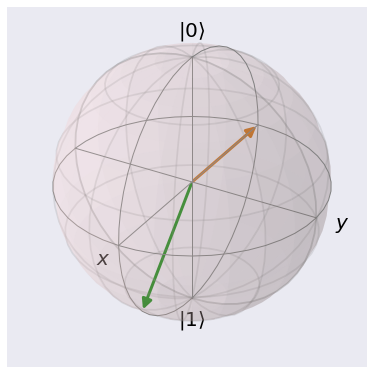

In [0]:
qubit1 = uno

H = Matrix([[1 ,  1],
            [1 , -1]]) * (1 / math.sqrt(2))

qubit2 = H * qubit1

b = blochPlot(qubit1,qubit2)
b.show()

#### Compuerta phase-shift (corrimiento de fase) $R_{\phi}$

Esta compuerta agrega una fase compleja $e^{i \phi}$  al qubit $\ket{1}$ y deja intacto al qubit $\ket{0}$, tal que:

$$
R_{\phi} \ket{0} = \ket{0} + e^{i \phi} \ket{1}
$$

Donde $\phi$ es un ángulo. Se representa por la matriz:

$$ R_\phi =  \begin{bmatrix}
1 & 0\\
0 & e^{i \phi} 
\end {bmatrix}  $$

Esta compuerta corresponde a una rotación $\phi$ sobre el plano $xy$.

#### Compuerta Pauli-X

Denotada por $X$, la compuerta Pauli-X se representa por la matriz:

$$ X = NOT =  \begin{bmatrix}
0 & 1 \\
1 & 0 
\end{bmatrix}  $$

Esta compuerta es análoga a la compuerta NOT clásica.

#### Compuerta Pauli-Y

Denotada por $Y$, la compuerta Pauli-Y se representa por la matriz:

$$ Y =  \begin{bmatrix}
0 & -i \\
i & 0 
\end{bmatrix}  $$

#### Compuerta Pauli-Z

Denotada por $Z$, la compuerta Pauli-Z se representa por la matriz:

$$ Z =  \begin{bmatrix}
1 & 0\\
0 & -1 
\end {bmatrix}  $$

Esta compuerta corresponde a una rotación de $\pi$ sobre el plano $xy$ :



In [0]:
# qubit1 = uno

# PauliX = Matrix([[0 , 1],
#                  [1 , 0]]) * (1 / math.sqrt(2))

# qubit2 = PauliX * qubit1

# b = blochPlot(qubit1,qubit2)
# b.show()

Nótese que las tres compuertas de Pauli satisfacen la propiedad:

$$ X^2 = Y^2 = Z^2  = I_2 = \begin{bmatrix}
1 & 0\\
0 & 1 
\end {bmatrix}$$

#### Compuerta $\sqrt{\text{NOT}}$

La compuerta raiz cuadrada de $\text{NOT}$ o $\sqrt{\text{NOT}}$ se representa por la matriz:

$$ \sqrt{\text{NOT}} =  \begin{bmatrix}
1+i & 1-i\\
1-i & 1+i 
\end {bmatrix}  $$

Esta compuerta satisface $\sqrt{\text{NOT}} \sqrt{\text{NOT}} = \text{NOT}$ y no tiene análogo clásico, dado que la imposibilidad de usar números complejos en las compuertas lógicas clásicas imposibilita su definifición.

### Compuertas de dos qbits

#### Compuerta $\text{SWAP}$

La compuerta $\text{SWAP}$ actúa en la base de qubits definida aquí, su matriz es:

$$ \text{SWAP} =  \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}  $$

#### Compuerta $\sqrt{\text{SWAP}}$

Análogamente a $\sqrt{\text{NOT}}$, la compuerta $\sqrt{\text{SWAP}}$ satisface

$$
\sqrt{\text{SWAP}} \sqrt{\text{SWAP}} = \text{SWAP} 
$$

La matriz de esta compuerta de dos qubits es:

$$ \sqrt{\text{SWAP}} =  \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \frac{1}{2}(1+i) & \frac{1}{2}(1-i) & 0 \\
0 & \frac{1}{2}(1-i) & \frac{1}{2}(1+i) & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}  $$ 

#### Compuerta $\text{NOT}$ controlada - $\text{CNOT}$

De vital importancia, la compuerta $\text{NOT}$ controlada o $\text{CNOT}$ es:

$$ \text{CNOT} =  \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 
\end{bmatrix}$$

Esta compuerta dos qubits aplica el operador $NOT$ al segundo qubit si y sólo si el primer qubit es $\ket{1}$. De lo contrario se comporta como la matriz identidad $I_4$. En un circuito cuántico se representa por:

![200px-CNOT_gate.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/CNOT_gate.svg/200px-CNOT_gate.svg.png)

### Mi primer circuito cuántico

Considérese el siguiente circuito cuántico:

![texto alternativo](https://i.imgur.com/s0PdURm.png)

Donde se definen las compuertas:

In [0]:
T = Matrix([[1 ,                      0],
              [0 , exp(I*sympy.pi*(1/4))]])

S = Matrix([[1 , 0],
            [0 , I]])

display(T,S)

⎡1      0    ⎤
⎢            ⎥
⎢    0.25⋅ⅈ⋅π⎥
⎣0  ℯ        ⎦

⎡1  0⎤
⎢    ⎥
⎣0  ⅈ⎦

Las cuáles son compuertas de phase shift con distintos ángulos. Se definen también las compuertas conocidas necesarias:

In [0]:
CNOT =   Matrix([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

I2 =   Matrix([[1 , 0],
               [0 , 1]])

H = Matrix([[1 ,  1],
            [1 , -1]]) * (1 / math.sqrt(2))

Sin embargo, aún no conocemos la forma matricial de la compuerta CNOT para tres qubits, con el primero como qubit de control. Denotaremos esta compuerta cómo $\text{CNOT3}$. Miremos como afecta nuestra base de tres qubits:

$$ \text{CNOT3}\ket{000} = \ket{000} = (1,0,0,0,0,0,0,0)$$
$$ \text{CNOT3}\ket{001} = \ket{001} = (0,1,0,0,0,0,0,0)$$
$$ \text{CNOT3}\ket{010} = \ket{010} = (0,0,1,0,0,0,0,0)$$
$$ \text{CNOT3}\ket{011} = \ket{011} = (0,0,0,1,0,0,0,0)$$
$$ \text{CNOT3}\ket{100} = \ket{101} = (0,0,0,0,0,1,0,0)$$
$$ \text{CNOT3}\ket{101} = \ket{100} = (0,0,0,0,1,0,0,0)$$
$$ \text{CNOT3}\ket{110} = \ket{111} = (0,0,0,0,0,0,0,1)$$
$$ \text{CNOT3}\ket{111} = \ket{110} = (0,0,0,0,0,0,1,0)$$

Definamos entonces nuestra compuerta lógica:

In [0]:
CNOT3 =   Matrix([[1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,1],
                  [0,0,0,0,0,0,1,0]])

Cada una de las compuertas lógicas que actuarán sobre los qubits de entrada serán denotadas por la palabra $\text{BLOCK}$, y corresponderán al respectivo producto tensorial de cada compuerta individual. Así:

In [0]:
BLOCK1  = TensorProduct(I2,I2,H)
BLOCK2  = TensorProduct(I2,CNOT)
BLOCK3  = TensorProduct(I2,I2,Dagger(T))
BLOCK4  = CNOT3
BLOCK5  = TensorProduct(I2,I2,T)
BLOCK6  = TensorProduct(I2,CNOT)
BLOCK7  = TensorProduct(I2,I2,Dagger(T))
BLOCK8  = CNOT3
BLOCK9  = TensorProduct(I2,Dagger(T),T)
BLOCK10 = TensorProduct(CNOT,I2)
BLOCK11 = TensorProduct(I2,Dagger(T),H)
BLOCK12 = TensorProduct(CNOT,I2)
BLOCK13 = TensorProduct(T,S,I2)

El efecto neto del circuito cuántico es entonces:

In [0]:
QCIRCUIT = BLOCK13*BLOCK12*BLOCK11*BLOCK10*BLOCK9*BLOCK8*BLOCK7*BLOCK6*BLOCK5*BLOCK4*BLOCK3*BLOCK2*BLOCK1

display(sympy.simplify(QCIRCUIT))

⎡1.0   0    0    0    0    0    0    0 ⎤
⎢                                      ⎥
⎢ 0   1.0   0    0    0    0    0    0 ⎥
⎢                                      ⎥
⎢ 0    0   1.0   0    0    0    0    0 ⎥
⎢                                      ⎥
⎢ 0    0    0   1.0   0    0    0    0 ⎥
⎢                                      ⎥
⎢ 0    0    0    0   1.0   0    0    0 ⎥
⎢                                      ⎥
⎢ 0    0    0    0    0   1.0   0    0 ⎥
⎢                                      ⎥
⎢ 0    0    0    0    0    0    0   1.0⎥
⎢                                      ⎥
⎣ 0    0    0    0    0    0   1.0   0 ⎦

Esta compuerta se conoce como $\text{NOT}$-controlado-controlado ($\text{CCNOT}$) o compuerta de Toffoli, y es similar a nuestra compuerta CNOT3, salvo que los dos primeros qubits son de control.